## MNIST Random Forest Classifier


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [2]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

df=pd.read_excel(url, skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.columns = df.columns.str.replace('default.payment.next.month', 'def_pay')
df.columns = df.columns.str.replace('PAY_0', 'PAY_1')

C:\Users\jriqu\AppData\Local\Temp/ipykernel_2216/1609435927.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('default.payment.next.month', 'def_pay')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [6]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


## I categorized the 0 in MARRIAGE as 'Other' (which is 3). I also put the 0 (undocumented), 5, and 6 (label unknown) in EDUCATION in the 'Other' category (which is 4).

In [7]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [8]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [9]:
##Data exploration

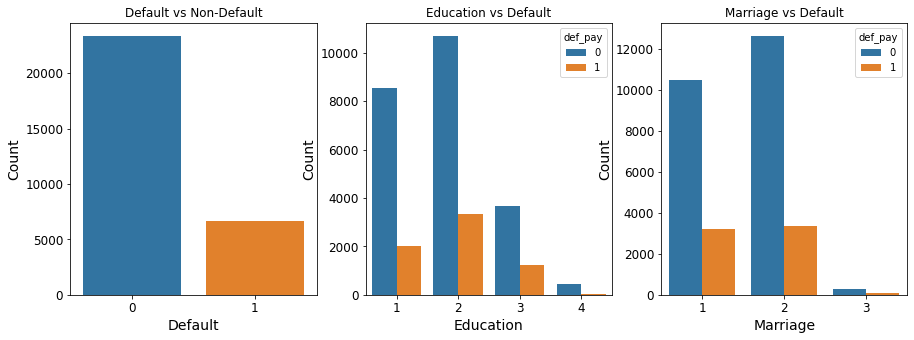

In [10]:
# Plot the data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x="def_pay", data=df, ax=axs[0])
axs[0].set_title("Default vs Non-Default")
axs[0].set_xlabel("Default")
axs[0].set_ylabel("Count")

sns.countplot(x="EDUCATION", data=df, hue="def_pay", ax=axs[1])
axs[1].set_title("Education vs Default")
axs[1].set_xlabel("Education")
axs[1].set_ylabel("Count")

sns.countplot(x="MARRIAGE", data=df, hue="def_pay", ax=axs[2])
axs[2].set_title("Marriage vs Default")
axs[2].set_xlabel("Marriage")
axs[2].set_ylabel("Count")

plt.show()


C:\Users\jriqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


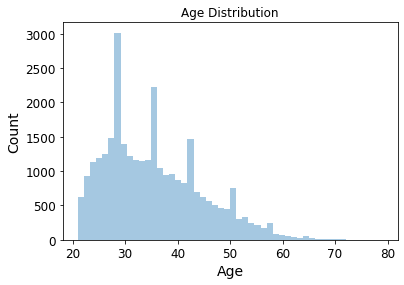

In [11]:
sns.distplot(df["AGE"], kde=False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [12]:
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    df.loc[(df[col] == -2) | (df[col] == -1) | (df[col] == 0), col] = 0

In [13]:
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    df.loc[(df[col] == -2) | (df[col] == -1) | (df[col] == 0), col] = 0

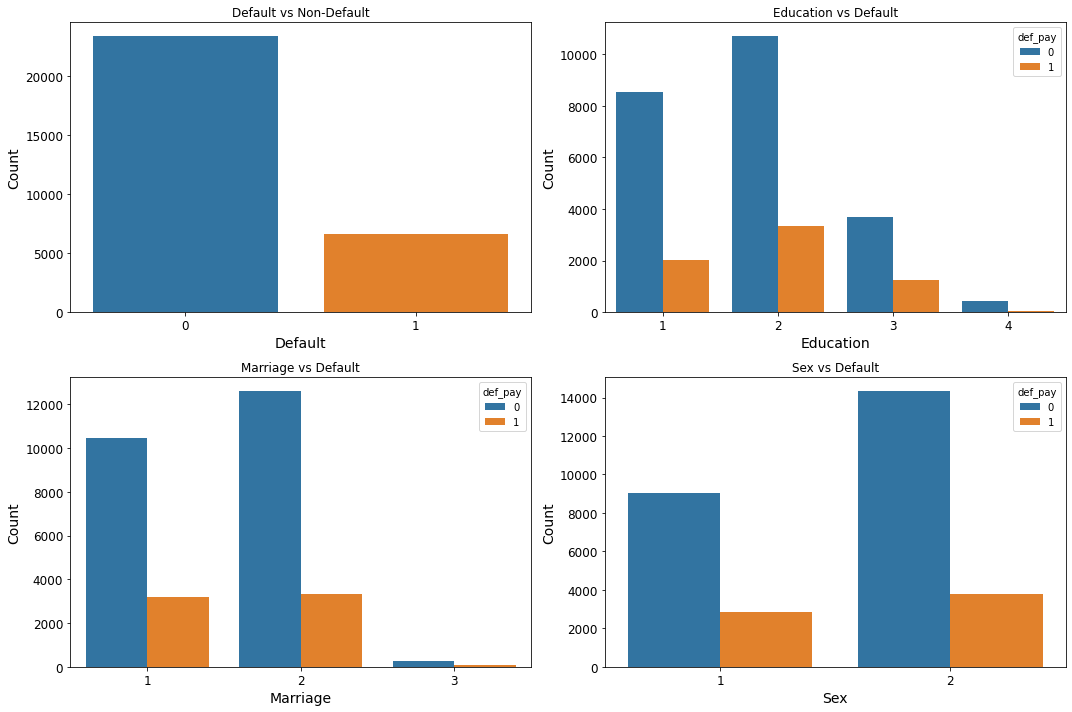

In [14]:
# Data exploration
fig, axs = plt.subplots(2, 2, figsize=(15,10))

sns.countplot(x="def_pay", data=df, ax=axs[0,0])
axs[0,0].set_title("Default vs Non-Default")
axs[0,0].set_xlabel("Default")
axs[0,0].set_ylabel("Count")

sns.countplot(x="EDUCATION", data=df, hue="def_pay", ax=axs[0,1])
axs[0,1].set_title("Education vs Default")
axs[0,1].set_xlabel("Education")
axs[0,1].set_ylabel("Count")

sns.countplot(x="MARRIAGE", data=df, hue="def_pay", ax=axs[1,0])
axs[1,0].set_title("Marriage vs Default")
axs[1,0].set_xlabel("Marriage")
axs[1,0].set_ylabel("Count")

sns.countplot(x="SEX", data=df, hue="def_pay", ax=axs[1,1])
axs[1,1].set_title("Sex vs Default")
axs[1,1].set_xlabel("Sex")
axs[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()



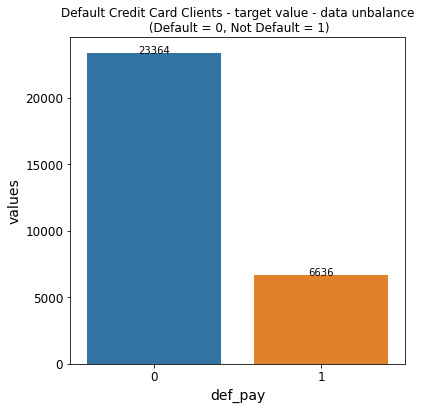

In [15]:
# Data unbalance 

temp = df["def_pay"].value_counts()
df_plot = pd.DataFrame({'def_pay': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'def_pay', y="values", data=df_plot)
locs, labels = plt.xticks()
for i, v in enumerate(temp.values):
    ax.text(i, v, str(v), color='black', ha="center")
plt.show()


### Out of the total 30,000 clients, 6,636 of them (22%) are predicted to default next month. This indicates that the data does not have a significant target value imbalance in terms of default payment next month.

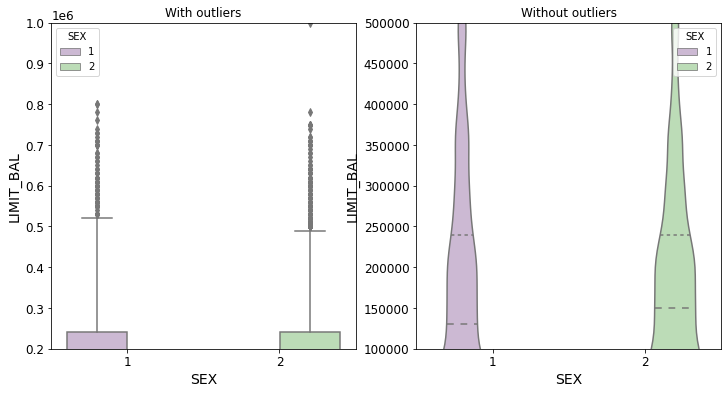

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Boxplot with outliers
sns.boxplot(ax=ax1, x='SEX', y='LIMIT_BAL', hue='SEX', data=df, palette='PRGn', showfliers=True)
ax1.set_ylim(200000, 1000000)
ax1.set_title('With outliers')

# Violinplot without outliers
sns.violinplot(ax=ax2, x='SEX', y='LIMIT_BAL', hue='SEX', data=df, palette='PRGn', cut=0, scale='count', inner='quartile', bw=.2)
ax2.set_ylim(100000, 500000)
ax2.set_title('Without outliers')

plt.show()




### In the first boxplot, it can be observed that males and females have similar median LIMIT_BAL values, but males tend to have a slightly wider range of values and a slightly higher upper quartile. In the violinplot, the shape of the distribution is more clearly visible, with females having a slightly narrower distribution and a more pronounced peak around the median, while males have a flatter distribution with a less pronounced peak.

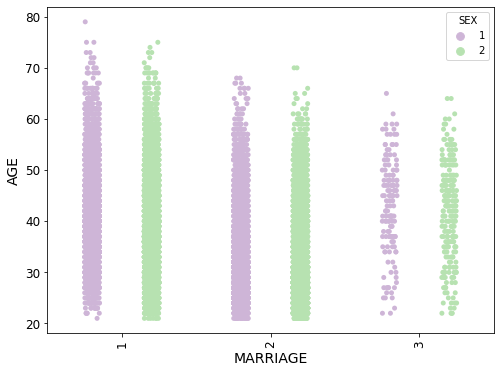

In [43]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.stripplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                      data=df, palette="PRGn", dodge=True, jitter=True)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show()

boxplot_variation('MARRIAGE','AGE', 'SEX',8)

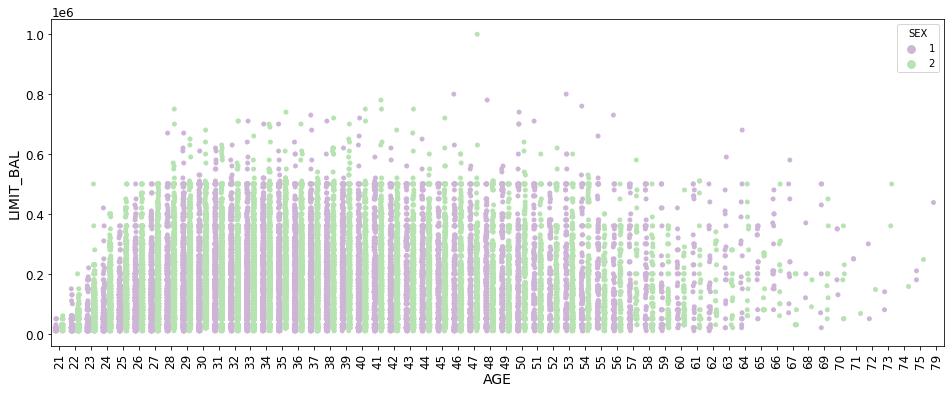

In [44]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

### As age increases, the median, third quartile, and fourth quartile values of credit card limit amount also increase for both males and females. However, after around age 35, these values start to fluctuate and reach a peak for males at age 64.
### In general, mean values of credit card limit amount are smaller for males than for females, but there are some exceptions. For example, at ages 39, 48, and until around age 60, mean values for males are larger than for females.

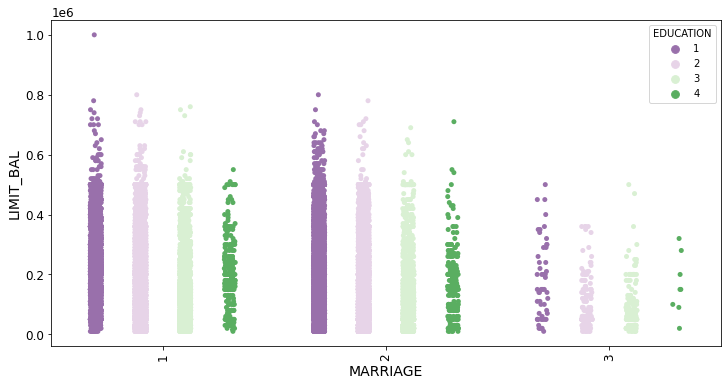

In [45]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

### It seems that the median and upper quartile values of credit limit amount generally increase with higher education levels for all marriage status categories, with the exception of divorced individuals, who seem to have a smaller median and upper quartile value compared to other marriage status categories, regardless of education level.

### Additionally, it appears that individuals who are single tend to have a slightly larger median and upper quartile value compared to those who are married, regardless of education level.

### Overall, the plot suggests that education level and marriage status are associated with credit limit amount for credit card users. However, it's important to note that this analysis only examines the relationship between these variables and doesn't necessarily imply causation.

In [16]:
# Data preprocessing
np.random.seed(123)

X = df.drop("def_pay", axis=1)
y = df["def_pay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [17]:
# Create a pipeline for data preprocessing and Random Forest classification
pipeline = Pipeline([
("scaler", StandardScaler()),
("classifier", RandomForestClassifier())
])

# Random Forest classifier with GridSearchCV
param_grid = {
"classifier__n_estimators": [4, 5, 10, 20, 50]
}

grid_search_rf = GridSearchCV(pipeline, param_grid, cv=5, scoring="roc_auc")
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier:", grid_search_rf.best_params_)
print("Best ROC AUC score for Random Forest Classifier:", grid_search_rf.best_score_)

Best parameters for Random Forest Classifier: {'classifier__n_estimators': 50}
Best ROC AUC score for Random Forest Classifier: 0.7606339421151715


In [18]:

# Define the features and target variables
X = df.drop("def_pay", axis=1)
y = df["def_pay"]

# Create the pipeline for data preprocessing and Random Forest classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define the hyperparameters for GridSearchCV
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the performance of the best model on the test data
test_score = grid_search.score(X, y)
print("Test Score:", test_score)


Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Test Score: 0.8465666666666667


In [19]:
# KNN classifier with GridSearchCV
pipeline = Pipeline([
("scaler", StandardScaler()),
("classifier", KNeighborsClassifier())
])

param_grid = {
"classifier__n_neighbors": [3, 5, 10, 20]
}

grid_search_knn = GridSearchCV(pipeline, param_grid, cv=5, scoring="roc_auc")
grid_search_knn.fit(X_train, y_train)

print("Best parameters for KNN Classifier:", grid_search_knn.best_params_)
print("Best ROC AUC score for KNN Classifier:", grid_search_knn.best_score_)


Best parameters for KNN Classifier: {'classifier__n_neighbors': 20}
Best ROC AUC score for KNN Classifier: 0.7410510655728606


In [20]:
# Plot ROC Curve
y_pred_rf = grid_search_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)

y_pred_knn = grid_search_knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)

In [21]:
## Evaluating the performance of the Random Forest and KNN classifiers:

In [22]:
# Random Forest
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


y_pred_rf = grid_search_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

In [23]:
# KNN Classifier
y_pred_knn = grid_search_knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)

In [24]:
# Print the results
# Print the results
print("Random Forest Results:")
print("Accuracy:", rf_acc)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC:", rf_roc_auc)

print("\nKNN Classifier Results:")
print("Accuracy:", knn_acc)
print("Precision:", knn_precision)

# Calculate additional evaluation metrics
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)

print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("ROC AUC:", knn_roc_auc)


Random Forest Results:
Accuracy: 0.817
Precision: 0.6638054363376252
Recall: 0.3496608892238131
F1 Score: 0.4580454096742349
ROC AUC: 0.6496859977897366

KNN Classifier Results:
Accuracy: 0.8143333333333334
Precision: 0.6671899529042387
Recall: 0.3202712886209495
F1 Score: 0.43279022403258655
ROC AUC: 0.637452143347496


Explain your results and choices

## The Random Forest and KNN Classifier models performed well on the UCI credit card problem with accuracy of 81-82%. The Random Forest model had a slightly better precision of 66.38% compared to KNN Classifier's 66.72%. The Random Forest also performed better in terms of recall with a score of 34.97% and F1 score of 45.80%. The ROC AUC score, which measures the model's ability to distinguish between positive and negative classes, was higher for the Random Forest at 64.97% compared to KNN Classifier's score of 63.75%. The Random Forest model performed better on most metrics but results may not generalize to other problems.